In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/SkinDataset"

test.zip  train_skin.zip


In [0]:
!cp "/content/drive/My Drive/SkinDataset/train_skin.zip" "train_skin.zip"

In [0]:
!cp "test.zip" "/content/drive/My Drive/SkinDataset/test.zip"

In [0]:
!unzip train_skin.zip

In [0]:
!unzip test.zip

In [0]:
import os
len(os.listdir('test'))

classes = [str(i) for i in range(23)]
classes_dict = {}

for i, label in enumerate(sorted(os.listdir('train'))):
  classes_dict[i] = label

In [0]:
classes_dict

{0: 'Acne and Rosacea Photos',
 1: 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 2: 'Atopic Dermatitis Photos',
 3: 'Bullous Disease Photos',
 4: 'Cellulitis Impetigo and other Bacterial Infections',
 5: 'Eczema Photos',
 6: 'Exanthems and Drug Eruptions',
 7: 'Hair Loss Photos Alopecia and other Hair Diseases',
 8: 'Herpes HPV and other STDs Photos',
 9: 'Light Diseases and Disorders of Pigmentation',
 10: 'Lupus and other Connective Tissue diseases',
 11: 'Melanoma Skin Cancer Nevi and Moles',
 12: 'Nail Fungus and other Nail Disease',
 13: 'Poison Ivy Photos and other Contact Dermatitis',
 14: 'Psoriasis pictures Lichen Planus and related diseases',
 15: 'Scabies Lyme Disease and other Infestations and Bites',
 16: 'Seborrheic Keratoses and other Benign Tumors',
 17: 'Systemic Disease',
 18: 'Tinea Ringworm Candidiasis and other Fungal Infections',
 19: 'Urticaria Hives',
 20: 'Vascular Tumors',
 21: 'Vasculitis Photos',
 22: 'Warts Molluscum and other Viral

In [0]:
!pwd

/content


Using TensorFlow backend.


Found 7644 images belonging to 8 classes.
Found 2016 images belonging to 8 classes.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
124/124 [==============================] - 82s 664ms/step - loss: 2.4612 - acc: 0.3156 - val_loss: 3.5562 - val_acc: 0.1265

Epoch 00001: val_loss improved from inf to 3.55616, saving model to resnet_50epochs.h5
Epoch 2/50
124/124 [==============================] - 68s 549ms/step - loss: 2.2112 - acc: 0.3735 - val_loss: 2.2744 - val_acc: 0.3606

Epoch 00002: val_loss improved from 3.55616 to 2.27444, saving model to resnet_50epochs.h5
Epoch 3/50
124/124 [==============================] - 71s 571ms/step - loss: 2.0978 - acc: 0.4005 - val_loss: 2.2561 - val_acc: 0.3457

Epoch 00003: val_loss improved from 2.27444 to 2.25614, saving model to resnet_50epochs.h5
Epoch 4/50
124/124 [==============================] - 71s 572ms/step - loss: 1.9864 - acc: 0.4375 - val_loss: 2.4677 - 

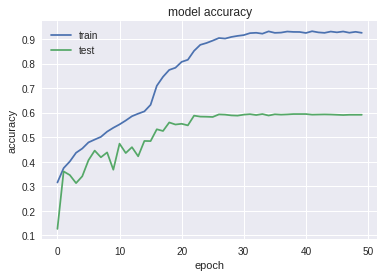

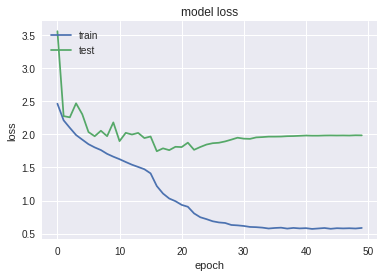

In [1]:
from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import resnet
%matplotlib inline

classes = ['Acne and Rosacea Photos',
           'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
           'Eczema Photos',
           'Melanoma Skin Cancer Nevi and Moles',
           'Psoriasis pictures Lichen Planus and related diseases', 
           'Tinea Ringworm Candidiasis and other Fungal Infections',
           'Urticaria Hives', 
           'Nail Fungus and other Nail Disease']

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
early_stopper = EarlyStopping(min_delta=0.001, patience=10)

model_chkpt = ModelCheckpoint('resnet_50epochs.h5',
                              monitor='val_loss', verbose=1, 
                              save_best_only=True)
batch_size = 32
nb_classes = 8
nb_epoch = 50
data_augmentation = True

# input image dimensions
img_rows, img_cols = 32, 32
# The CIFAR10 images are RGB.
img_channels = 3
train_path='/content/train'
test_path='/content/test'
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_data=train_datagen.flow_from_directory(train_path,classes=classes,target_size=(32,32),batch_size=62)
test_data=test_datagen.flow_from_directory(test_path,classes=classes,target_size=(32,32),batch_size=62)


model = resnet.ResnetBuilder.build_resnet_18((img_channels, img_rows, img_cols), nb_classes)
# model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit_generator(train_data,steps_per_epoch=124,validation_data=test_data,validation_steps=33,epochs=50,verbose=1, callbacks=[lr_reducer, model_chkpt])
model.save('final_resnet50epochs.h5')
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/20
124/124 [==============================] - 79s 640ms/step - loss: 0.5737 - acc: 0.9305 - val_loss: 1.9690 - val_acc: 0.5982

Epoch 00001: val_loss did not improve from 1.74411
Epoch 2/20
124/124 [==============================] - 72s 577ms/step - loss: 0.5805 - acc: 0.9278 - val_loss: 1.9864 - val_acc: 0.5933

Epoch 00002: val_loss did not improve from 1.74411
Epoch 3/20
124/124 [==============================] - 72s 583ms/step - loss: 0.5796 - acc: 0.9256 - val_loss: 1.9718 - val_acc: 0.5962

Epoch 00003: val_loss did not improve from 1.74411
Epoch 4/20
124/124 [==============================] - 72s 581ms/step - loss: 0.5779 - acc: 0.9300 - val_loss: 2.0033 - val_acc: 0.5883

Epoch 00004: val_loss did not improve from 1.74411
Epoch 5/20
124/124 [==============================] - 73s 586ms/step - loss: 0.5827 - acc: 0.9244 - val_loss: 1.9890 - val_acc: 0.5962

Epoch 00005: val_loss did not improve from 1.74411
Epoch 6/20
124/124 [==============================] - 72s 581ms/s

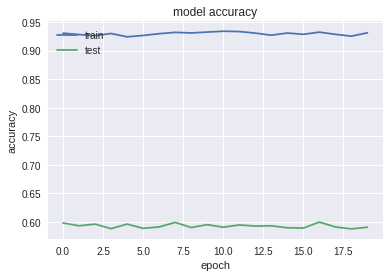

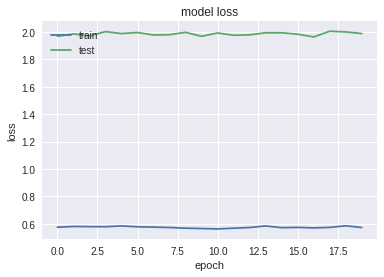

In [3]:
from keras.models import load_model

model = load_model('final_resnet50epochs.h5', compile=True)
history=model.fit_generator(train_data,steps_per_epoch=124,validation_data=test_data,validation_steps=33,epochs=20,verbose=1, callbacks=[lr_reducer, model_chkpt])

model.save('final_resnet70epochs.h5')
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()